In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import time

In [3]:
"Função para plotar o potencial -> x,y,V"

def plot2D(x, y, V):
    fig = plt.figure(figsize=(10, 10), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, V[:], rstride=1, cstride=1, cmap=cm.magma,
            linewidth=1, antialiased=False)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$V$')
    plt.show();

In [4]:
"Plota as equipotenciais"
def plot_equip(x,y,V):
    fig = plt.contourf(x,y,V,20,cmap='magma')
    plt.rcParams['figure.figsize'] = (8,8)
    plt.colorbar()
    plt.title('Linhas equipotenciais do Potencial Elétrico')
    plt.xlabel("x")
    plt.ylabel("y")
    #plt.axes().set_aspect('equal')

In [5]:
"Calcula a equação de Laplace"
def laplace2d(V,nx,ny,l1norm_target):
    l1norm = 1
    Vn = np.empty_like(V)
    contador = 0
    while l1norm > l1norm_target:
        Vn = V.copy()
        for i in range (1,int(((nx-1)/2)+1)):
            for j in range (1,int(((ny-1)/2)+1)):
                V[j,i] = 0.25*(Vn[j+1,i] + Vn[j-1,i] + Vn[j,i+1] + Vn[j,i-1])
                
        #Usando a simetria        
        V[int(((ny-1)/2)+1),1:int(((nx-1)/2)+1)] = V[int(((ny-1)/2)-1),1:int(((ny-1)/2)+1)]
        V[1:int(((ny-1)/2)+1),int(((nx-1)/2)+1)] = (-1)*V[1:int(((ny-1)/2)+1),int(((nx-1)/2)-1)]

            
        #Condições de Contorno
        V[:, 0] = 0  # V = 0 @ x = -1
        V[:, nx-1] = 0  # V = 0 @ x = 1
        V[0,:] = 0  # V = 0 @ y = -1
        V[ny-1,:] = 0  # V = 0 @ y = 1
        V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(3/5)))]=1 #Placa em x = -0.4
        V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(7/5)))]=-1 
        #Calculando a norma
        l1norm = np.sqrt(np.sum((V - Vn)**2)/np.sum(Vn**2))
        
        
        contador += 1 

    #Agora completando o resto
    for i in range(1,int(((nx-1)/2)+1)):
        for j in range(1,int(((ny-1)/2)+1)):
            V[j,((nx-1)-i)] = (-1)*V[j,i] 
            V[(ny-1-j),i] = V[j,i]
            V[(ny-1-j),(ny-1-i)] = (-1)*V[j,i]
    
    print("Iterações=",contador)
    return V

In [6]:
"Definindo a rede"
nx = 121 #número de divisões em x
ny = 121 #número de divisões em y
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)

In [7]:
"Condições de contorno"
V = np.zeros((ny, nx))  # create a XxY vector of 0's
V[:, 0] = 0  # V = 0 @ x = -1
V[:, nx-1] = 0  # V = 0 @ x = 1
V[0,:] = 0  # V = 0 @ y = -1
V[ny-1,:] = 0  # V = 0 @ y = 1
V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(3/5)))]=1 #Placa em x = -0.4
V[int(round(((nx-1)/2)*(3/5))):int(round(((nx-1)/2)*(7/5)+1)),int(round(((ny-1)/2)*(7/5)))]=-1 #Placa em x = 0.4

In [8]:
"Inicia o relógio"
t0 = time.process_time()

In [9]:
V=laplace2d(V,nx,ny,1e-8)

Iterações= 6632


In [10]:
"Termina o relógio e conta"
t1 = time.process_time()
dt = t1 - t0
print('Tempo =', dt)

Tempo = 38.818122


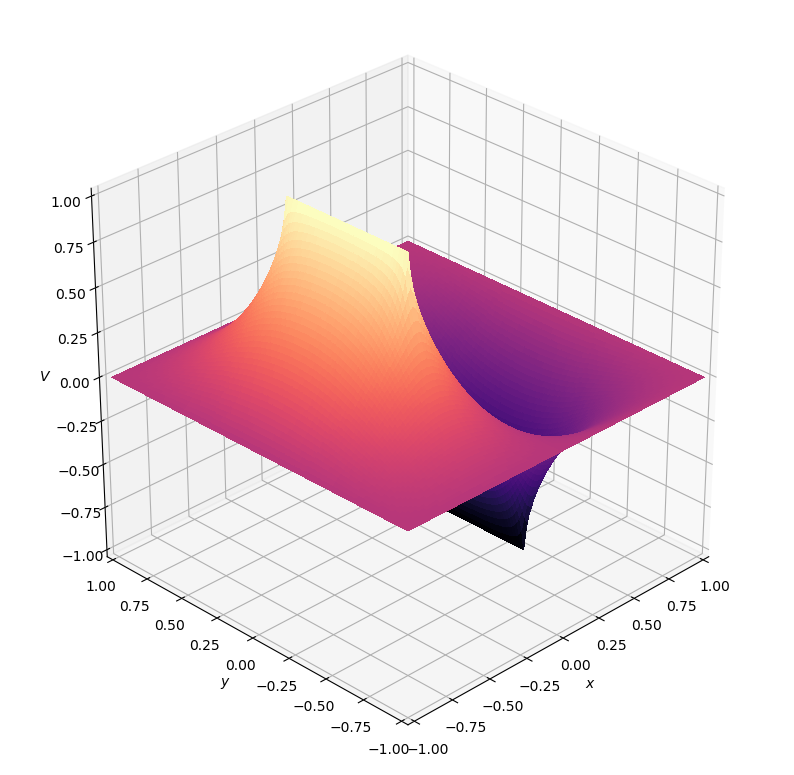

In [11]:
plot2D(x, y, V)

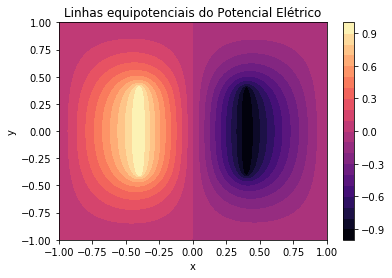

In [12]:
plot_equip(x,y,V)
#plt.savefig('Equip.png')